<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,69.886549,75.644787,-0.001042,155.530295,155.531734,-0.001439
1,0.0,1.0,42.396882,36.388566,0.007338,88.792787,88.785417,0.007370
2,0.0,2.0,77.856916,20.839503,-0.030228,108.666191,108.697878,-0.031687
3,0.0,3.0,84.219726,55.221814,0.001820,149.443360,149.442740,0.000620
4,0.0,4.0,52.749790,76.336548,-0.000933,139.085404,139.086111,-0.000707
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,97.439336,90.306955,0.000839,197.747130,197.747065,0.000065
119996,999.0,116.0,84.832878,83.672487,0.000821,178.506186,178.505914,0.000272
119997,999.0,117.0,96.047249,34.667011,-0.010377,140.703883,140.712182,-0.008299
119998,999.0,118.0,67.464257,99.176907,-0.000870,176.640293,176.642673,-0.002380


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.886549  75.644787 -0.001042  155.530295  155.531734 -0.001439
      1.0    42.396882  36.388566  0.007338   88.792787   88.785417  0.007370
      2.0    77.856916  20.839503 -0.030228  108.666191  108.697878 -0.031687
      3.0    84.219726  55.221814  0.001820  149.443360  149.442740  0.000620
      4.0    52.749790  76.336548 -0.000933  139.085404  139.086111 -0.000707
...                ...        ...       ...         ...         ...       ...
999.0 115.0  97.439336  90.306955  0.000839  197.747130  197.747065  0.000065
      116.0  84.832878  83.672487  0.000821  178.506186  178.505914  0.000272
      117.0  96.047249  34.667011 -0.010377  140.703883  140.712182 -0.008299
      118.0  67.464257  99.176907 -0.000870  176.640293  176.642673 -0.002380
      119.0  47.090906  67.406724 -0.004284  124.493346  124.497692 -0.004346

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.886549  75.644787 -0.001042  155.530295  155.531734 -0.001439
      1.0    42.396882  36.388566  0.007338   88.792787   88.785417  0.007370
      2.0    77.856916  20.839503 -0.030228  108.666191  108.697878 -0.031687
      3.0    84.219726  55.221814  0.001820  149.443360  149.442740  0.000620
      4.0    52.749790  76.336548 -0.000933  139.085404  139.086111 -0.000707
...                ...        ...       ...         ...         ...       ...
999.0 115.0  97.439336  90.306955  0.000839  197.747130  197.747065  0.000065
      116.0  84.832878  83.672487  0.000821  178.506186  178.505914  0.000272
      117.0  96.047249  34.667011 -0.010377  140.703883  140.712182 -0.008299
      118.0  67.464257  99.176907 -0.000870  176.640293  176.642673 -0.002380
      119.0  47.090906  67.406724 -0.004284  124.493346  124.497692 -0.004346

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,69.886549,75.644787,-0.001042,155.530295,155.531734,-0.001439
1,0.0,1.0,42.396882,36.388566,0.007338,88.792787,88.785417,0.007370
2,0.0,2.0,77.856916,20.839503,-0.030228,108.666191,108.697878,-0.031687
3,0.0,3.0,84.219726,55.221814,0.001820,149.443360,149.442740,0.000620
4,0.0,4.0,52.749790,76.336548,-0.000933,139.085404,139.086111,-0.000707
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,97.439336,90.306955,0.000839,197.747130,197.747065,0.000065
119996,999.0,116.0,84.832878,83.672487,0.000821,178.506186,178.505914,0.000272
119997,999.0,117.0,96.047249,34.667011,-0.010377,140.703883,140.712182,-0.008299
119998,999.0,118.0,67.464257,99.176907,-0.000870,176.640293,176.642673,-0.002380


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.886549  75.644787 -0.001042  155.530295  155.531734 -0.001439
      1.0    42.396882  36.388566  0.007338   88.792787   88.785417  0.007370
      2.0    77.856916  20.839503 -0.030228  108.666191  108.697878 -0.031687
      3.0    84.219726  55.221814  0.001820  149.443360  149.442740  0.000620
      4.0    52.749790  76.336548 -0.000933  139.085404  139.086111 -0.000707
...                ...        ...       ...         ...         ...       ...
999.0 115.0  97.439336  90.306955  0.000839  197.747130  197.747065  0.000065
      116.0  84.832878  83.672487  0.000821  178.506186  178.505914  0.000272
      117.0  96.047249  34.667011 -0.010377  140.703883  140.712182 -0.008299
      118.0  67.464257  99.176907 -0.000870  176.640293  176.642673 -0.002380
      119.0  47.090906  67.406724 -0.004284  124.493346  124.497692 -0.004346

[120000 rows x 6 columns]

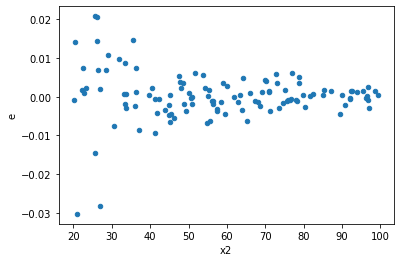

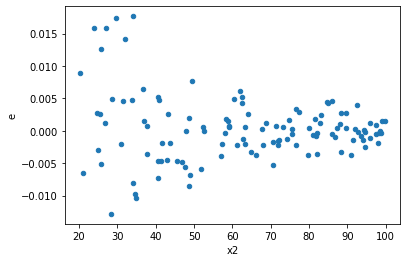

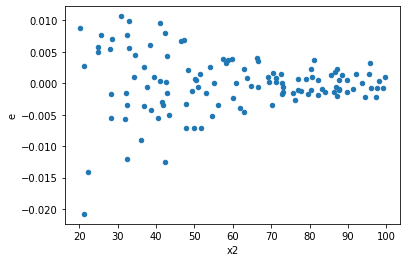

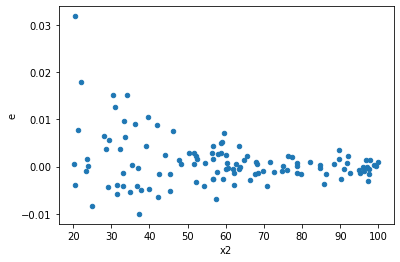

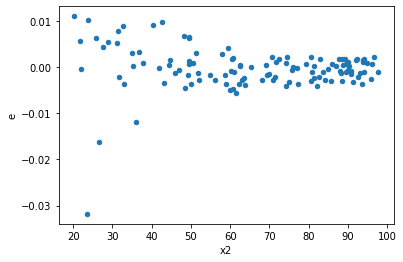

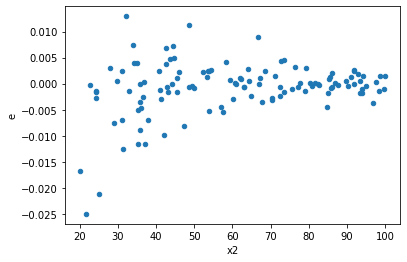

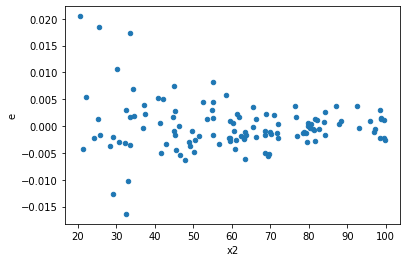

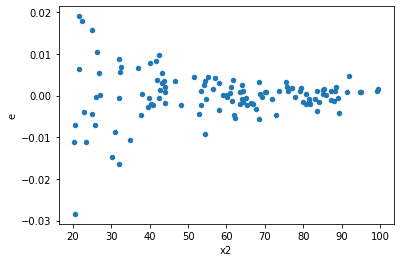

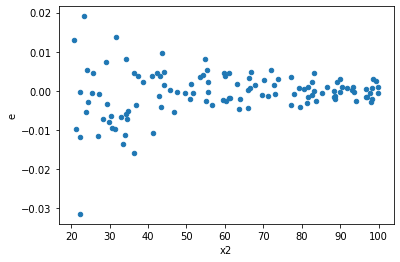

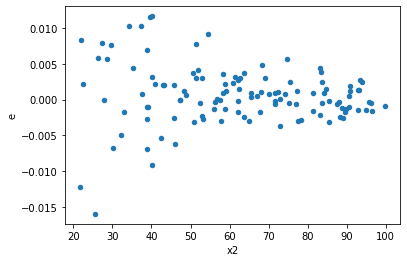

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,69.0,47.0,0.0016155330469576066,0.003137444797926664,2.341352241967546e-05,6.675414463673753e-05,2.851093630433025,0.00022725128206335654,0.9998863743589683,0.00011362564103167827,Reject001=0 : Heteroscedasticity
1.0,61.0,55.0,0.00042518732747137727,0.0025513349466072532,6.970284056907824e-06,4.6387908120131876e-05,6.655095795437439,3.2594371646155196e-11,0.9999999999837028,1.6297185823077598e-11,Reject001=0 : Heteroscedasticity
6.0,59.0,57.0,0.0004286750751870307,0.0021009452172315174,7.265679240458147e-06,3.685868802160557e-05,5.072985856072748,5.327654761799749e-09,0.9999999973361726,2.6638273808998747e-09,Reject001=0 : Heteroscedasticity
7.0,57.0,59.0,0.0005280819082039184,0.003424417166286838,9.2645948807705e-06,5.80409689201159e-05,6.264814562003694,4.828226707331851e-11,0.9999999999758589,2.4141133536659254e-11,Reject001=0 : Heteroscedasticity
8.0,62.0,54.0,0.0007285799806031611,0.003234993149150889,1.1751290009728405e-05,5.9907280539831275e-05,5.0979322687327535,8.136806117775564e-09,0.9999999959315969,4.068403058887782e-09,Reject001=0 : Heteroscedasticity
9.0,63.0,53.0,0.0003875711796413417,0.0015928405952047016,6.151923486370503e-06,3.0053596135937765e-05,4.885235683200721,2.1601821442729374e-08,0.9999999891990893,1.0800910721364687e-08,Reject001=0 : Heteroscedasticity
10.0,74.0,42.0,0.0005773223107019333,0.001512348415688033,7.801652847323423e-06,3.600829561161983e-05,4.61547012104922,5.501583106859442e-07,0.9999997249208447,2.750791553429721e-07,Reject001=0 : Heteroscedasticity
12.0,60.0,56.0,0.0005281840713003725,0.002203009576367514,8.80306785500621e-06,3.933945672084847e-05,4.468834884474569,6.889956472022618e-08,0.9999999655502176,3.444978236011309e-08,Reject001=0 : Heteroscedasticity
13.0,46.0,70.0,0.0005273520638045461,0.00371709214753124,1.1464175300098828e-05,5.310131639330343e-05,4.631935137353113,9.711127901823602e-09,0.999999995144436,4.855563950911801e-09,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,69.0,47.0,0.0016155330469576066,0.003137444797926664,2.341352241967546e-05,6.675414463673753e-05,2.851093630433025,0.00022725128206335654,Reject001=0 : Heteroscedasticity
1.0,61.0,55.0,0.00042518732747137727,0.0025513349466072532,6.970284056907824e-06,4.6387908120131876e-05,6.655095795437439,3.2594371646155196e-11,Reject001=0 : Heteroscedasticity
2.0,81.0,35.0,0.002296470593089554,0.00021533711531915891,2.835148880357474e-05,6.152489009118826e-06,0.2170076164869014,1.4668641335755068e-08,Reject001=0 : Heteroscedasticity
3.0,53.0,63.0,0.0024232823763950103,0.00047395001860108053,4.57223089885851e-05,7.523016168271119e-06,0.16453710091826934,3.3565450459933013e-10,Reject001=0 : Heteroscedasticity
4.0,65.0,51.0,0.0023443830487738853,0.00035117477862197906,3.606743151959824e-05,6.8857799729799815e-06,0.19091406520695553,9.657788528673488e-10,Reject001=0 : Heteroscedasticity
5.0,39.0,77.0,0.0014494295219656737,0.0013789162262489297,3.7164859537581374e-05,1.790800293829779e-05,0.48185310427957057,0.013787370863398046,Reject001=1 : Homoscedasticity
6.0,59.0,57.0,0.0004286750751870307,0.0021009452172315174,7.265679240458147e-06,3.685868802160557e-05,5.072985856072748,5.327654761799749e-09,Reject001=0 : Heteroscedasticity
7.0,57.0,59.0,0.0005280819082039184,0.003424417166286838,9.2645948807705e-06,5.80409689201159e-05,6.264814562003694,4.828226707331851e-11,Reject001=0 : Heteroscedasticity
8.0,62.0,54.0,0.0007285799806031611,0.003234993149150889,1.1751290009728405e-05,5.9907280539831275e-05,5.0979322687327535,8.136806117775564e-09,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    964
Reject001=1 : Homoscedasticity       36
Name: Result_test, dtype: int64